In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 10, 1)
y = -(x-5)**2

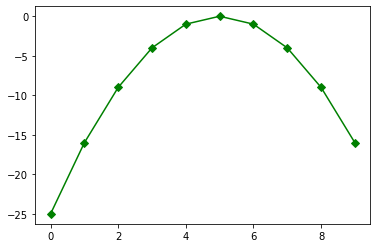

In [3]:
plt.plot(x, y,'-gD', markevery=x)

In [4]:
# Differences between two consecutive elements
dx = np.ediff1d(x)
dy = np.ediff1d(y)
print('dx:', dx)
print('dy:', dy)

dx: [1 1 1 1 1 1 1 1 1]
dy: [ 9  7  5  3  1 -1 -3 -5 -7]


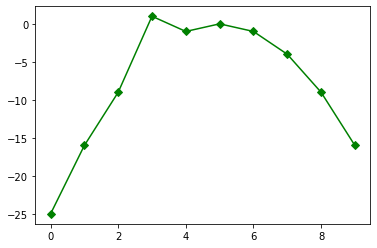

In [5]:
change_point_nr = 3
change_difference = 5

y[change_point_nr] += change_difference
plt.plot(x, y,'-gD', markevery=x)

In [6]:
# Differences between two consecutive elements
dx = np.ediff1d(x)
dy = np.ediff1d(y)
print('dx:', dx)
print('dy:', dy)

dx: [1 1 1 1 1 1 1 1 1]
dy: [ 9  7 10 -2  1 -1 -3 -5 -7]


In [7]:
if dy[change_point_nr-1] > dy[change_point_nr-2]:
    y[change_point_nr] = y[change_point_nr - 1] + dx[change_point_nr-2]*(dy[change_point_nr-2] + dy[change_point_nr-1])/(dx[change_point_nr-2] + dx[change_point_nr-1])

[0 1 2 3 4 5 6 7 8 9]
[-25 -16  -9   0  -1   0  -1  -4  -9 -16]


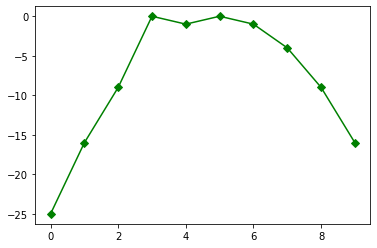

In [8]:
print(x)
print(y)
plt.plot(x, y,'-gD', markevery=x)

In [9]:
# Differences between two consecutive elements
dx = np.ediff1d(x)
dy = np.ediff1d(y)
print('dx:', dx)
print('dy:', dy)

dx: [1 1 1 1 1 1 1 1 1]
dy: [ 9  7  9 -1  1 -1 -3 -5 -7]


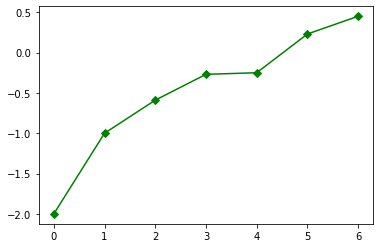

In [10]:
x1 = np.array([0,1,2,3,4,5,6])
y1 = -np.array([2,1, 0.59, 0.27, 0.25, -0.23, -0.45])
plt.plot(x1, y1,'-gD')

#import QuantLib as ql
#i = ql.CubicNaturalSpline(x1, y1)
#plt.plot(x1, [i(x) for x in X_3m])

In [11]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import BSpline

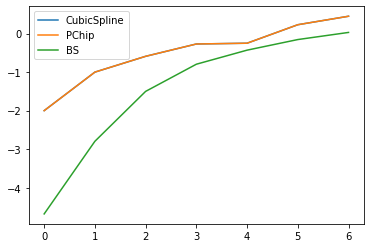

In [12]:
cs = CubicSpline(x1, y1)
pc = PchipInterpolator(x1, y1)
bs = BSpline(x1, y1, k=2)
y_cs = cs(x1)
y_pc = pc(x1)
y_bs = bs(x1)
plt.plot(x1, y_cs, label="CubicSpline")
plt.plot(x1, y_pc, label="PChip")
plt.plot(x1, y_bs, label="BS")
plt.legend()

In [53]:
x2 = np.linspace(0.0, 1.0, 11) 
#y2 = -(x2-0.4)**2
#y2 = np.array([10.27717167, 10.35308728, 10.41774559, 10.46779265, 10.51007183, 10.53684318, 10.55423776, 10.55486446, 10.54832913, 10.5265346,  10.49515484])
#y2 = np.array([4.65189348, 4.65213862, 4.65230485, 4.65239319, 4.65240366, 4.6523323,4.65218728, 4.65195831, 4.65165285, 4.65126559, 4.65080466])
y2 = np.array([4.6908297, 4.6924041, 4.69369866, 4.69471336, 4.69544932, 4.6959044, 4.69608009, 4.69597555, 4.69559278, 4.69493042, 4.69398812])
y2[5] += 0.0005
#y2[8] -= 0.01
#y2 = np.zeros(11)
#y2[2] = 0.4
#y2[3] = 0.35
#y2[8] = 1
#y2[10] = 0.2
print(x2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [54]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * (x**2) + b * x + c

params, params_covariance = optimize.curve_fit(test_func, x2, y2,
                                               p0=[-1, 1, 1])

print(params)

[-0.01456401  0.01772173  4.69078804]


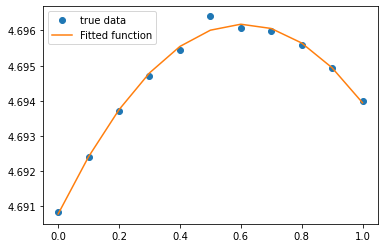

In [55]:
plt.plot(x2, y2, "o", label="true data")
plt.plot(x2, test_func(x2, params[0], params[1], params[2]),
         label='Fitted function')
plt.legend()

In [30]:
x2 = np.linspace(-1, 1, 11)
y2 = np.array([10.27717167, 10.35308728, 10.41774559, 10.46779265, 10.51007183, 10.53684318, 10.55423776, 10.55486446, 10.54832913, 10.5265346,  10.49515484])
y2[5] += 0.05
#y2=np.zeros(11)
#y2[4]=0.5

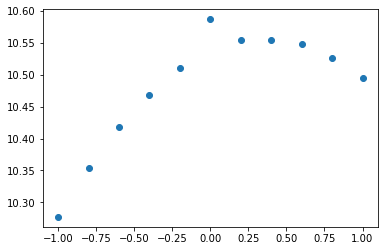

In [31]:
plt.plot(x2, y2, "o", label="true data")

In [33]:
params, params_covariance = optimize.curve_fit(test_func, x2, y2,
                                               p0=[-1, 1, 1])
params_constrained, _ = optimize.curve_fit(test_func, x2, y2, p0=[-1, 1, 1], bounds = ([-np.inf, 0, -np.inf], [0, np.inf, np.inf]))
print("Unconstrained Parameters:", params)
print("Constrained Parameters:", params_constrained)

Unconstrained Parameters: [-0.16569366  0.10880752 10.54735319]
Constrained Parameters: [-0.16569366  0.10880751 10.54735319]


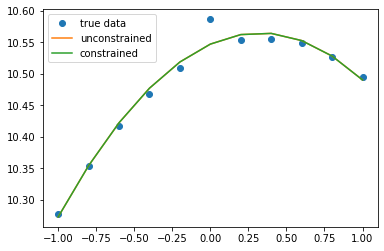

In [34]:
plt.plot(x2, y2, "o", label="true data")
plt.plot(x2, test_func(x2, params[0], params[1], params[2]),
         label='unconstrained')
plt.plot(x2, test_func(x2, params_constrained[0], params_constrained[1], params_constrained[2]), label="constrained")
plt.legend()

In [35]:
y_fitted = test_func(x2, params[0], params[1], params[2])
y_diff = y_fitted - y2

In [36]:
y_updated = y2 + y_diff

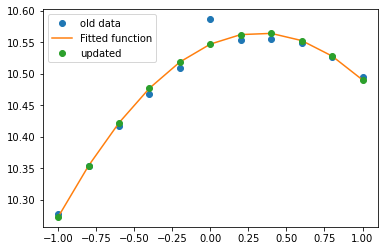

In [37]:
plt.plot(x2, y2, "o", label="old data")
plt.plot(x2, test_func(x2, params[0], params[1], params[2]),
         label='Fitted function')
plt.plot(x2, y_updated, "o", label="updated")
plt.legend()